In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


### 导入数据

In [2]:
train = pd.read_csv(r'../data/titanic/train.csv')
test = pd.read_csv(r'../data/titanic/test.csv')
PassengerId = test['PassengerId']
all_data = pd.concat([train, test], ignore_index= True)

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train["Survived"].isnull().value_counts()

False    891
Name: Survived, dtype: int64

In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


预览数据

In [6]:
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [7]:
train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


+ PassengerID（ID）  
+ Survived(存活与否)
+ Pclass（客舱等级，较为重要）
+ Name（姓名，可提取出更多信息）
+ Sex（性别，较为重要）
+ Age（年龄，较为重要）
+ Parch（直系亲友）# of parents / children aboard the Titanic
+ SibSp（旁系）# of siblings / spouses aboard the Titanic
+ Ticket（票编号）
+ Fare（票价）
+ Cabin（客舱编号）
+ Embarked（上船的港口编号）

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


我们可以看出数据的Age, Cabin, Embarked存在空值

In [10]:
train['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [11]:
train['Cabin'].value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
E101           3
F33            3
              ..
B80            1
A36            1
B82 B84        1
F E69          1
F38            1
Name: Cabin, Length: 147, dtype: int64

In [12]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

考虑各个属性与生存情况的关系

生存情况和性别

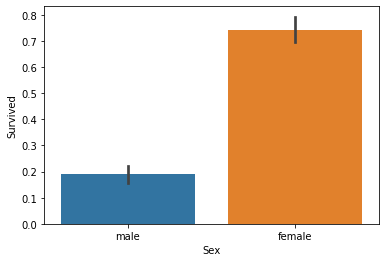

In [13]:
sns.barplot(x = 'Sex', y = 'Survived', data = train)

生存情况和旁系数量

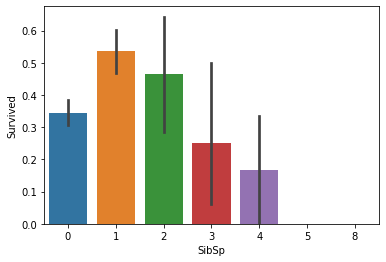

In [14]:
sns.barplot(x = 'SibSp', y = 'Survived', data = train)

生存情况和直系数量

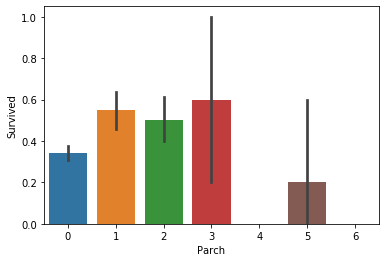

In [15]:
sns.barplot(x='Parch', y='Survived', data=train)

生存情况和年龄

Text(12.359751157407416, 0.5, 'density')

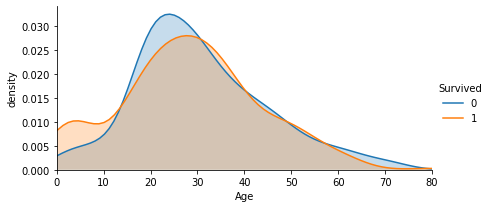

In [16]:
# hue表示要画的线的种类 0 and 1
facet = sns.FacetGrid(train,hue='Survived', aspect=2)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlabel('Age') 
plt.ylabel('density') 

生存情况和登船口岸

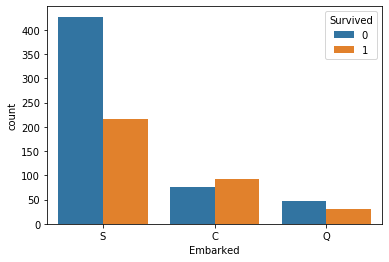

In [17]:
sns.countplot('Embarked',hue='Survived',data=train)

生存情况和称谓

In [18]:
all_data['Name'][:20]

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

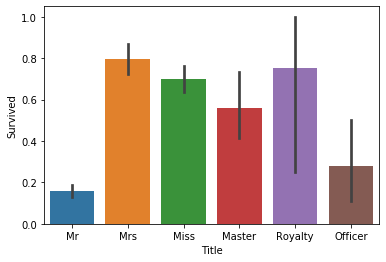

In [19]:
all_data['Title'] = all_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
# all_data['Title'].value_counts()
Title_dict = {}
Title_dict.update(dict.fromkeys(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer'))
Title_dict.update(dict.fromkeys(['Don', 'Sir', 'the Countess', 'Dona', 'Lady'], 'Royalty'))
Title_dict.update(dict.fromkeys(['Mme', 'Ms', 'Mrs'], 'Mrs'))
Title_dict.update(dict.fromkeys(['Mlle', 'Miss'], 'Miss'))
Title_dict.update(dict.fromkeys(['Mr'], 'Mr'))
Title_dict.update(dict.fromkeys(['Master','Jonkheer'], 'Master'))

all_data['Title'] = all_data['Title'].map(Title_dict)
sns.barplot(x='Title', y='Survived',data=all_data)

家庭人数和生存关系

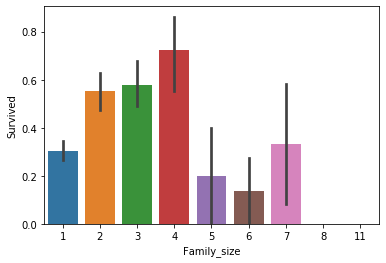

In [20]:
all_data['Family_size'] = all_data['SibSp'] + all_data['Parch'] + 1
sns.barplot(x='Family_size', y='Survived', data=all_data)

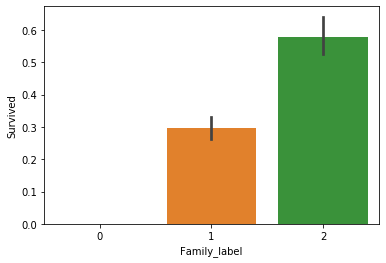

In [21]:
def Fam_label(s):
    if (s >= 2) & (s <= 4):
        return 2
    elif ((s > 4) & (s <= 7)) | (s == 1):
        return 1
    elif (s > 7):
        return 0
all_data['Family_label'] = all_data['Family_size'].apply(Fam_label)
sns.barplot(x='Family_label', y='Survived', data=all_data)

甲板和生存的关系

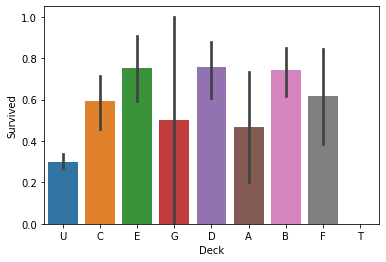

In [22]:
all_data['Cabin'] = all_data['Cabin'].fillna('Unknown')
# 提取甲板首字母
all_data['Deck'] = all_data['Cabin'].str.get(0)
sns.barplot(x="Deck", y="Survived", data=all_data)
# all_data['Cabin'].value_counts()

Ticket number与生存的关系

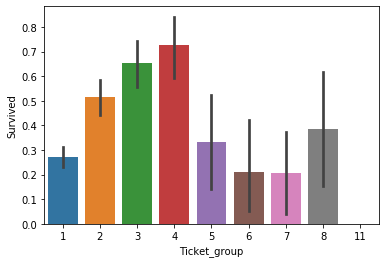

In [23]:
# all_data['Ticket'].value_counts()
Ticket_count = dict(all_data['Ticket'].value_counts())
# Ticket_count
all_data['Ticket_group'] = all_data['Ticket'].apply(lambda x:Ticket_count[x])
sns.barplot(x='Ticket_group', y='Survived', data=all_data)

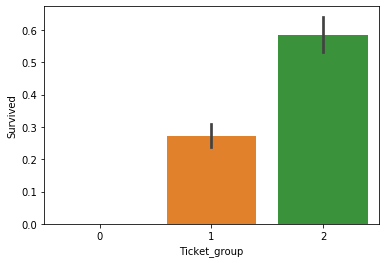

In [24]:
def Ticket_Label(s):
    if (s >= 2) & (s <= 4):
        return 2
    elif ((s > 4) & (s <= 8)) | (s == 1):
        return 1
    elif (s > 8):
        return 0

all_data['Ticket_group'] = all_data['Ticket_group'].apply(Ticket_Label)
sns.barplot(x='Ticket_group', y='Survived', data=all_data)

### 数据清洗

1)缺失值填充
Age Feature：Age缺失量为263，缺失量较大，用Sex, Title, Pclass三个特征构建随机森林模型，填充年龄缺失值。

In [25]:
all_data.info
# all_data.columns

<bound method DataFrame.info of        Age    Cabin Embarked      Fare  \
0     22.0  Unknown        S    7.2500   
1     38.0      C85        C   71.2833   
2     26.0  Unknown        S    7.9250   
3     35.0     C123        S   53.1000   
4     35.0  Unknown        S    8.0500   
...    ...      ...      ...       ...   
1304   NaN  Unknown        S    8.0500   
1305  39.0     C105        C  108.9000   
1306  38.5  Unknown        S    7.2500   
1307   NaN  Unknown        S    8.0500   
1308   NaN  Unknown        C   22.3583   

                                                   Name  Parch  PassengerId  \
0                               Braund, Mr. Owen Harris      0            1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                                Heikkinen, Miss. Laina      0            3   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4   
4                              Allen, Mr. William Henry      0      

In [26]:
from sklearn.ensemble import RandomForestRegressor
age_df = all_data[['Age', 'Pclass', 'Title', 'Sex']]
age_df = pd.get_dummies(age_df)
know_age = age_df[age_df["Age"].notnull()].as_matrix()
unknow_age = age_df[age_df["Age"].isnull()].as_matrix()
# 取第一列Age的值
y = know_age[:, 0]
# 取第一列后面几列的值
X = know_age[:, 1:]
rfr = RandomForestRegressor(random_state=0, n_estimators=100, n_jobs=-1)
rfr.fit(X, y)
prediction = rfr.predict(unknow_age[:, 1:])
all_data.loc[(all_data.Age.isnull()), "Age"] = prediction

In [27]:
all_data["Age"].isnull().value_counts()

False    1309
Name: Age, dtype: int64

Embarked Feature：Embarked缺失量为2，缺失Embarked信息的乘客的Pclass均为1，且Fare均为80，因为Embarked为C且Pclass为1的乘客的Fare中位数为80，所以缺失值填充为C。


In [28]:
all_data[all_data.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_size,Family_label,Deck,Ticket_group
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572,Miss,1,1,B,2
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572,Mrs,1,1,B,2


In [29]:
all_data.groupby(by=["Pclass", "Embarked"]).Fare.median()    # 注意这里用的是中位数，不是平均数

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [30]:
all_data["Embarked"] = all_data["Embarked"].fillna("C")
all_data[all_data.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_size,Family_label,Deck,Ticket_group


Fare Feature：Fare缺失量为1，缺失Fare信息的乘客的Embarked为S，Pclass为3，所以用Embarked为S，Pclass为3的乘客的Fare中位数填充。

In [31]:
all_data[all_data["Fare"].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_size,Family_label,Deck,Ticket_group
1043,60.5,Unknown,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701,Mr,1,1,U,1


In [32]:
all_data.groupby(by=["Pclass", "Embarked"]).Fare.median()

Pclass  Embarked
1       C           78.2667
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [33]:
all_data["Fare"] = all_data["Fare"].fillna("8.05")

2)同组识别  
把姓氏相同的乘客划分为同一组，从人数大于一的组中分别提取出每组的妇女儿童和成年男性。

In [34]:
all_data["Surname"] = all_data["Name"].apply(lambda x: x.split(",")[0].strip())
Surname_count = dict(all_data["Surname"].value_counts())
# Surname_count
all_data["FamilyGroup"] = all_data['Surname'].apply(lambda x: Surname_count[x])
all_data["FamilyGroup"]
Female_Child_Group = all_data.loc[(all_data["FamilyGroup"]>=2) & ((all_data["Age"]<=12) | (all_data["Sex"]=="female"))]
Male_Adult_Group = all_data.loc[(all_data["FamilyGroup"]>=2) & (all_data["Age"]>12) & (all_data["Sex"]=="male")]

In [35]:
Female_Child_Group

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_size,Family_label,Deck,Ticket_group,Surname,FamilyGroup
1,38.000000,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,2,2,C,2,Cumings,2
3,35.000000,C123,S,53.1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,2,2,C,2,Futrelle,2
7,2.000000,Unknown,S,21.075,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909,Master,5,1,U,1,Palsson,5
8,27.000000,Unknown,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742,Mrs,3,2,U,2,Johnson,6
9,14.000000,Unknown,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736,Mrs,2,2,U,2,Nasser,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,30.000000,C7,S,164.867,"Bonnell, Miss. Caroline",0,1292,1,female,0,NaN,36928,Miss,1,1,C,2,Bonnell,2
1293,22.000000,Unknown,C,59.4,"Gibson, Miss. Dorothy Winifred",1,1294,1,female,0,NaN,112378,Miss,2,2,U,2,Gibson,2
1300,3.000000,Unknown,S,13.775,"Peacock, Miss. Treasteall",1,1301,3,female,1,NaN,SOTON/O.Q. 3101315,Miss,3,2,U,2,Peacock,3
1302,37.000000,C78,Q,90,"Minahan, Mrs. William Edward (Lillian E Thorpe)",0,1303,1,female,1,NaN,19928,Mrs,2,2,C,2,Minahan,3


In [36]:
Female_Child = pd.DataFrame(Female_Child_Group.groupby("Surname")["Survived"].mean().round(2).value_counts())    # round(2)保留两位小数
Female_Child.columns=["GroupCount"]
Female_Child

,GroupCount
1.00,115
0.00,31
0.75,2
0.33,1
0.14,1


发现绝大部分女性和儿童组的平均存活率都为1或0，即同组的女性和儿童要么全部幸存，要么全部遇难。

Text(0.5, 0, 'AverageSurvived')

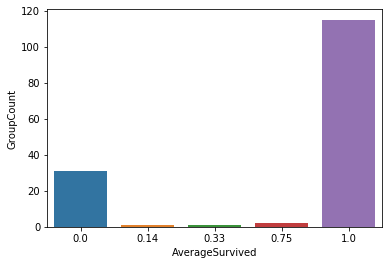

In [37]:
sns.barplot(x=Female_Child.index, y=Female_Child["GroupCount"]).set_xlabel("AverageSurvived")

In [38]:
Male_Adult = pd.DataFrame(Male_Adult_Group.groupby("Surname")["Survived"].mean().round(2).value_counts())
Male_Adult.columns = ["GroupCount"]
Male_Adult

,GroupCount
0.00,122
1.00,20
0.50,6
0.33,2
0.25,1


绝大部分成年男性组的平均存活率也为1或0。

Text(0.5, 0, 'AverageSurvived')

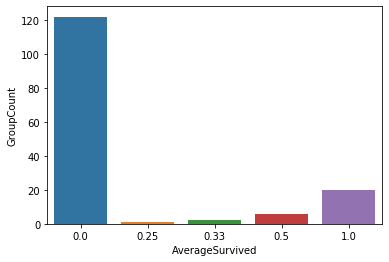

In [39]:
sns.barplot(x=Male_Adult.index, y=Male_Adult["GroupCount"]).set_xlabel("AverageSurvived")

因为普遍规律是女性和儿童幸存率高，成年男性幸存较低，所以我们把不符合普遍规律的反常组选出来单独处理。把女性和儿童组中幸存率为0的组设置为遇难组，把成年男性组中存活率为1的设置为幸存组，推测处于遇难组的女性和儿童幸存的可能性较低，处于幸存组的成年男性幸存的可能性较高。

In [40]:
Female_Child_Group_1 = Female_Child_Group.groupby("Surname")["Survived"].mean()
Dead_List = set(Female_Child_Group_1[Female_Child_Group_1.apply(lambda x: x==0)].index)
Dead_List

Male_Adult_Group_1 = Male_Adult_Group.groupby("Surname")["Survived"].mean()
Survived_List = set(Male_Adult_Group_1[Male_Adult_Group_1.apply(lambda x: x==1)].index)
Survived_List

{'Beane',
 'Beckwith',
 'Bishop',
 'Bradley',
 'Cardeza',
 'Chambers',
 'Daly',
 'Dick',
 'Duff Gordon',
 'Frauenthal',
 'Frolicher-Stehli',
 'Goldenberg',
 'Greenfield',
 'Harder',
 'Jonsson',
 'Jussila',
 'Kimball',
 'McCoy',
 'Nakid',
 'Taylor'}

为了使处于这两种反常组中的样本能够被正确分类，对测试集中处于反常组中的样本的Age，Title，Sex进行惩罚修改。

In [41]:
train = all_data.loc[all_data["Survived"].notnull()]
test = all_data.loc[all_data["Survived"].isnull()]
test.head()
test.loc[(test["Surname"].apply(lambda x: x in Dead_List)), "Sex"] = "male"
test.loc[(test["Surname"].apply(lambda x: x in Dead_List)), "Age"] = 60
test.loc[(test["Surname"].apply(lambda x: x in Dead_List)), "Tile"] = "Mr"
test.loc[(test["Surname"].apply(lambda x: x in Survived_List)), "Sex"] = "female"
test.loc[(test["Surname"].apply(lambda x: x in Survived_List)), "Age"] = 5
test.loc[(test["Surname"].apply(lambda x: x in Survived_List)), "Title"] = "Miss"

3)特征转换  
选取特征，转换为数值变量，划分训练集和测试集。

In [42]:
all_data = pd.concat([train, test])
all_data.columns
all_data = all_data[['Survived','Pclass','Sex','Age','Fare','Embarked','Title','Family_label','Deck','Ticket_group']]
# get_dummies 是利用pandas实现one hot encode的方式
all_data = pd.get_dummies(all_data)
# all_data
train = all_data[all_data["Survived"].notnull()]
test = all_data[all_data["Survived"].isnull()].drop("Survived", axis=1)
X = train.as_matrix()[:, 1:]
y = train.as_matrix()[:, 0]

### 建模和优化  
1) 参数优化

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest

pipe = Pipeline([("select", SelectKBest(k=20)),
                ("classify", RandomForestClassifier(random_state=10, max_features='sqrt'))])

param_test = {"classify__n_estimators":list(range(20, 50, 2)),
             "classify__max_depth":list(range(3, 60, 3))}    # 参数前面要两个下划线

gsearch = GridSearchCV(estimator=pipe, param_grid=param_test, scoring="roc_auc", cv=10)

gsearch.fit(X, y)
print(gsearch.best_params_, gsearch.best_score_)

{'classify__max_depth': 6, 'classify__n_estimators': 22} 0.8737405953323296


In [45]:
# 训练模型
from sklearn.pipeline import make_pipeline

select = SelectKBest(k=20)
clf = RandomForestClassifier(random_state=10, warm_start=True,
                            n_estimators=26,
                            max_depth=6,
                            max_features='sqrt')
pipeline = make_pipeline(select, clf)
pipeline.fit(X,y)

Pipeline(memory=None,
         steps=[('selectkbest',
                 SelectKBest(k=20,
                             score_func=<function f_classif at 0x00000193C2A40598>)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=6,
                                        max_features='sqrt',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=26, n_jobs=None,
                                        oob_score=False, random_state=10,
                                        verbose=0, warm_start=True))],
         verbose

In [48]:
from sklearn.model_selection import cross_val_score, metrics
cv_score = cross_validation.cross_val_score(pipeline, X, y, cv= 10)
print("CV Score : Mean - %.7g | Std - %.7g " % (np.mean(cv_score), np.std(cv_score)))

ImportError: cannot import name 'metrics'

参考：https://www.jianshu.com/p/e79a8c41cb1a